In [1]:
import os
#import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#from datetime import datetime
import rasterio
import tkinter as tk
from tkinter import messagebox
from tkinter import filedialog
import shutil
from shapely.geometry import Polygon


C:\Users\Mark.Hennen\Anaconda3\envs\pygdal\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [31]:
def copyFiles (inDir, file, outDir):
    # Open data using rasterio
    src = rasterio.open(inDir+'/'+file)

    # Read the data from the raster
    data = src.read(1)  # You might need to adjust the band number (1-indexed) based on your data
    meta = src.meta

    # Specify the output file name for the modified GeoTIFF
    output_filename = outDir+ '/' + file

    # Open a new GeoTIFF file for writing with the modified data
    with rasterio.open(output_filename, 'w', **meta) as dst:
        # Write the modified data to the new dataset
        dst.write(data, 1)  # The second argument is the band index (1-based)
        print('file uploaded')

def search_directory (directory, destination, dataList):
    global outDir
    obsCount = 0
    emsCount = 0
    # Define name of output folder
    outDir  = directory+'/'+destination

    # Check if the destination folder exists, create if not
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    else:
        shutil.rmtree(outDir)
        os.makedirs(outDir)

    # Search through Bulk data folder for relevant data
    for folder in os.listdir(directory):
        # Filter data by those selected from search 
        if folder[:-8] in dataList:
            obsCount += 1
            foldDir = dataDir+'/'+folder
            # Loop through files in observation folder to extract data
            for filename in os.listdir(foldDir):
                # Filter only geotif/s to copy
                if filename.endswith('.tif'):
                    emsCount += 1
                    # Copy files 
                    copyFiles (foldDir, filename, outDir)
                    
    print('Number of Observations: ', obsCount)
    print('Number of Emissions', emsCount)

def search_dataframe():
    global wkdir, gdfLoc2, dataDir, filtered_gdf, export_name
    
    # Get working directory and GHGSat archive data locations
    wkdir, gdfLoc2 = entry_dir.get(), entry_file.get()
        
    # Get date search info
    date_query_start, date_query_end = entry_start.get(), entry_end.get()
    
    # Get co-ordinate search info
    if len(entry_pad.get())> 0:
        lat, lon = float(entry_lat.get()),float(entry_lon.get())
        buff = float(entry_pad.get())    
    else:
        lat, lon = [],[]
        buff = []
    
    # Get export details
    export_name = entry_exp.get()
    
    # Set working directory
    if not wkdir: 
        messagebox.showwarning('Please select working directory.')
        return
    else:
        os.chdir(wkdir)
        dataDir = wkdir
    
    # Locate ghgsat data archive shapefile
    if not gdfLoc2: 
        messagebox.showwarning('Please select GHGSat Archive database.')
        return
    else:
        gdfLoc2  = gpd.read_file(gdfLoc2)
        gdfLoc2['datetime'] = pd.to_datetime(gdfLoc2['date'])
    
    # Check to see if date range has been set
    if not date_query_start and not date_query_end:
        messagebox.showwarning('Empty Search', 'Please enter a search query.')
        return
    
    # Filtering based on search criteria
    filtered_gdf = gdfLoc2.copy()
    
    if date_query_start:
        filtered_gdf = filtered_gdf[filtered_gdf['datetime'] >= date_query_start] 
    
    if date_query_end:
        filtered_gdf = filtered_gdf[filtered_gdf['datetime'] <= date_query_end]
        
    if buff:
        # Create a search box using location and buffer extent
        polygon_data = {
            'Name': ['Extent1'],
            'geometry': [Polygon([(lon-buff, lat-buff), (lon-buff, lat+buff), (lon+buff, lat+buff), (lon+buff, lat-buff)])]
        }
        polygon_gdf = gpd.GeoDataFrame(polygon_data, crs='EPSG:4326')
        
        # Filter data using search box
        filtered_gdf = gpd.sjoin(filtered_gdf, polygon_gdf, op='within')

    if not filtered_gdf.empty:
        # Plot results as a map
        fig, ax = plt.subplots(figsize=(8, 6))
        filtered_gdf.plot(ax=ax, markersize=100, color='red', label='Search locations')
        
        ax.set_title('Filtered Points')
        ax.legend()
        plt.tight_layout()
        plt.show()
        
        # Export filtered data as shapefile if export name entered 
        if export_name:
            filtered_gdf = filtered_gdf.assign(datetime = filtered_gdf['datetime'].astype(str))
            obsIds = [x for x in filtered_gdf.obsid]
            
            search_directory (dataDir, export_name, obsIds)
            
            filtered_gdf.to_file(f'{outDir}/{export_name}_locations.shp', driver='ESRI Shapefile') 
            

    else:
        messagebox.showinfo('No Results', 'No matching records found.')


C:\Users\Mark.Hennen\Anaconda3\envs\pygdal\lib\tkinter\__init__.py:1458: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.tk.mainloop(n)


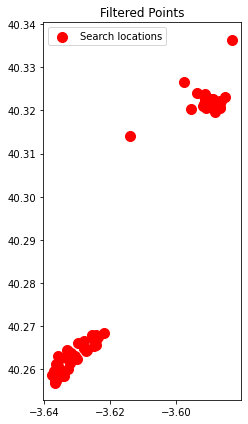

-a55wt7_1211467
-aA2BU1_1211506
-aa7mfB_1205022
-aB372Z_1211529
-aE8HfB_1211600
-ai26BH_1205252
-aIAG6F_1208675
-an3WaP_1205944
-aP3JfC_1206777
-aq7RL5_1207926
-at3pRz_1206920
-aW-cxI_1204339
-ax88H8_1205662
-axH_NZ_1209481
-aZ5wt7_1204872
-b1Zkyv_1208466
-b49ETe_1207412
-b7229m_1209134
-b83Ngw_1209380
-ba6ztg_1208989
-bb7B8S_1207240
-bbGLZO_1210740
-bf0IrL_1210678
-bF3IGm_1210125
-bg4OPq_1203284
-bH02l-_1207759
-bh3Nfh_1203665
-bH6pyS_1210296
-bi8DCw_1203732
-biGXl-_1207370
-bl16BH_1210464
-bm3ysa_1204153
-bn4tPq_1204239
-bo4q2y_1204804
-bo58_X_1204989
-bpE2l-_1207321
-bpEvS5_1210082
-bR1jkv_1211035
-bu-xYu_1206245
-bu5Tjq_1206148
-bV8jOu_1210945
-bVGjTe_1210812
-bwKkA__1207204
-bwLluu_1209862
-c-5JVp_1209476
-c017rs_1209480
-c14aiD_1207077
-c20yCh_1207305
-c20yCh_1207305
C2_23011242_20230106_20230629_-c20yCh_9384_CH4PL.tif
file uploaded
C2_23011242_20230106_20230629_-c20yCh_9384_CH4SR.csv
C2_23011242_20230106_20230629_-c20yCh_9385_CH4PL.tif
file uploaded
C2_23011242_20230106_20230629

C:\Users\Mark.Hennen\AppData\Local\Temp\ipykernel_400\1728061860.py:130: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  filtered_gdf.to_file(f'{outDir}/{export_name}_locations.shp', driver='ESRI Shapefile')


In [30]:
def selectDir():
    global my_Dir
    root.foldername = filedialog.askdirectory(initialdir = "", title = "Working Directory")
#     root.filename = filedialog.askopenfilename(initialdir = "", title = "Search File")
    my_Dir = root.foldername
    entry_dir.set(my_Dir)  # Update the entry widget with the selected file's path

def selectFile():
    global my_File
    root.filename = filedialog.askopenfilename(initialdir = my_Dir, title = "GHGSat Archive Meta Data", filetypes = ((".shp files", "*.shp"), ("all files", "*.*")))
    my_File = root.filename
    entry_file.set(my_File.split('/')[-1])  # Update the entry widget with the selected file's path


# Create the main Tkinter window
root = tk.Tk()
root.title('GHGSat Data Search')

# Select working directory button 
wkdir_btn = tk.Button(root, text='Select Working Directory', command=selectDir).pack(pady=5)
entry_dir = tk.StringVar()  # Variable to hold the entry's text
entry_widget = tk.Entry(root, textvariable=entry_dir, width=75)
entry_widget.pack(pady=5)

# Select GHGSat data archive metadata file
data_btn = tk.Button(root, text='Select data archive', command=selectFile).pack(pady=5)
entry_file = tk.StringVar()  # Variable to hold the entry's text
entry_widget = tk.Entry(root, textvariable=entry_file, width=50)
entry_widget.pack(pady=5)

# Entry fields for search query
label_start = tk.Label(root, text='Start Date:')
label_start.pack()
entry_start = tk.Entry(root, width=50)
entry_start.pack(pady=5)

label_end = tk.Label(root, text='End Date:')
label_end.pack()
entry_end = tk.Entry(root, width=50)
entry_end.pack(pady=5)

label_lat = tk.Label(root, text='Lat:')
label_lat.pack()
entry_lat = tk.Entry(root, width=50)
entry_lat.pack(pady=5)

label_lon = tk.Label(root, text='Lon:')
label_lon.pack()
entry_lon = tk.Entry(root, width=50)
entry_lon.pack(pady=5)

label_pad = tk.Label(root, text='Roi Buffer:')
label_pad.pack()
entry_pad = tk.Entry(root, width=50)
entry_pad.pack(pady=5)

label_exp = tk.Label(root, text='Export name:')
label_exp.pack()
entry_exp = tk.Entry(root, width=50)
entry_exp.pack(pady=5)

# Search button
search_button = tk.Button(root, text='Search', command=search_dataframe)
search_button.pack(pady=10)

root.mainloop()
